In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv("housing.csv")

In [8]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
data.dropna(inplace=True) #It drops any rows or columns that contain NaN (Not a Number) values
#inplace=True means the changes are made directly to the original data DataFrame

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [20]:
# It's used to split your dataset into training and testing sets
from sklearn.model_selection import train_test_split 

# creating the feature matrix x, which contains all columns except median_house_value
# axis=1 indicates you're dropping a column, not a row
# These features will be used as inputs to the model.
x=data.drop(['median_house_value'],axis=1)

# isolating the target variable y—the column you're trying to predict.
# median_house_value becomes the label the model will learn to predict based on x
y=data['median_house_value']

In [36]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [38]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [30]:
# Here are the patterns and inputs (x)—learn how they relate to the output (y).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [34]:
train_data=x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6809,-118.11,34.10,20.0,3090.0,802.0,2109.0,738.0,3.3801,<1H OCEAN,192500.0
7403,-118.23,33.95,27.0,504.0,142.0,789.0,167.0,0.9518,<1H OCEAN,91400.0
13939,-117.27,34.23,26.0,6339.0,1244.0,1177.0,466.0,3.7708,INLAND,110400.0
4176,-118.22,34.10,33.0,1903.0,386.0,1187.0,340.0,4.0469,<1H OCEAN,196600.0
1470,-121.98,37.95,16.0,2984.0,406.0,1317.0,397.0,6.7821,INLAND,265900.0
...,...,...,...,...,...,...,...,...,...,...
9583,-120.50,37.32,13.0,1936.0,384.0,1158.0,367.0,2.7500,INLAND,83200.0
16680,-120.59,35.13,8.0,6638.0,1054.0,2710.0,966.0,4.6776,<1H OCEAN,295500.0
8743,-118.32,33.81,28.0,2142.0,445.0,1140.0,422.0,4.8438,<1H OCEAN,346200.0
5848,-118.31,34.18,11.0,3112.0,890.0,1700.0,851.0,3.1587,<1H OCEAN,181300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

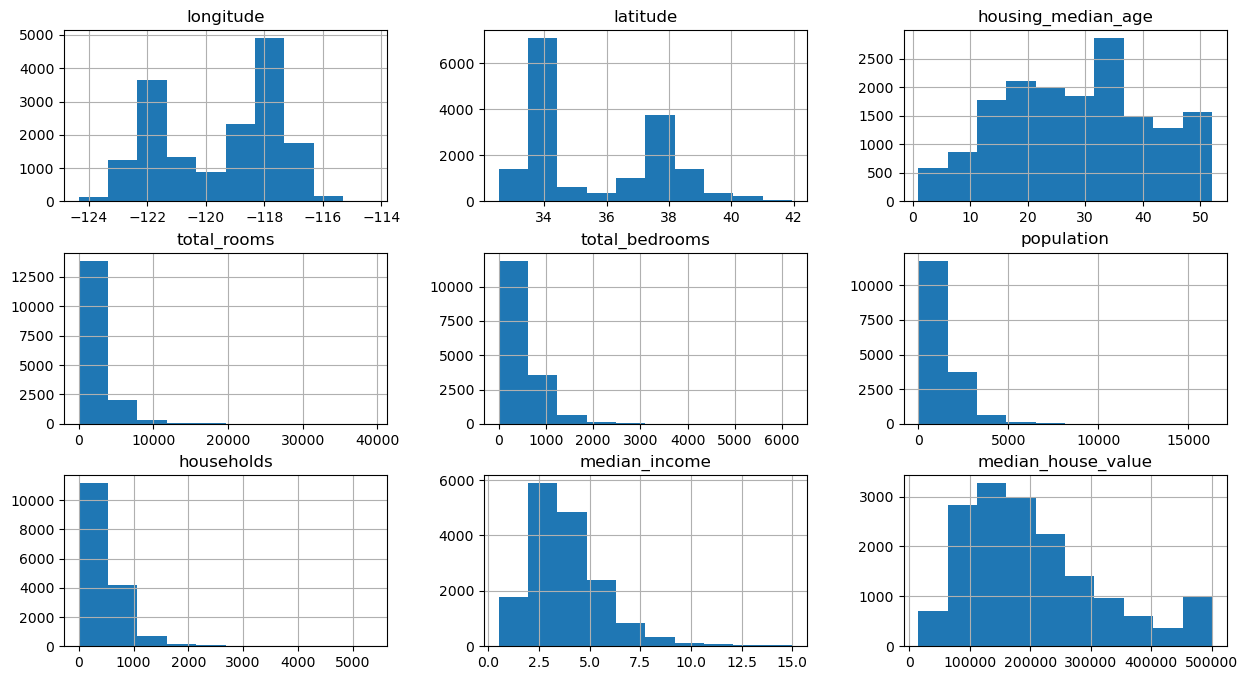

In [42]:
train_data.hist(figsize=(15,8)) # plots histograms for each numeric column in the train_data

In [46]:
train_data.select_dtypes(include='number').corr() # understanding the linear relationships between numerical features in your DataFrame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924775,-0.116248,0.046187,0.072278,0.104474,0.057536,-0.015622,-0.047357
latitude,-0.924775,1.000000,0.018536,-0.036424,-0.068721,-0.112287,-0.072530,-0.078886,-0.142452
housing_median_age,-0.116248,0.018536,1.000000,-0.362687,-0.323290,-0.304361,-0.306168,-0.117525,0.105986
total_rooms,0.046187,-0.036424,-0.362687,1.000000,0.929472,0.859073,0.916678,0.200395,0.138429
total_bedrooms,0.072278,-0.068721,-0.323290,0.929472,1.000000,0.880918,0.977915,-0.007129,0.053504
population,0.104474,-0.112287,-0.304361,0.859073,0.880918,1.000000,0.912254,0.006373,-0.022738
households,0.057536,-0.072530,-0.306168,0.916678,0.977915,0.912254,1.000000,0.015045,0.069323
median_income,-0.015622,-0.078886,-0.117525,0.200395,-0.007129,0.006373,0.015045,1.000000,0.688980
median_house_value,-0.047357,-0.142452,0.105986,0.138429,0.053504,-0.022738,0.069323,0.688980,1.000000


<Axes: >

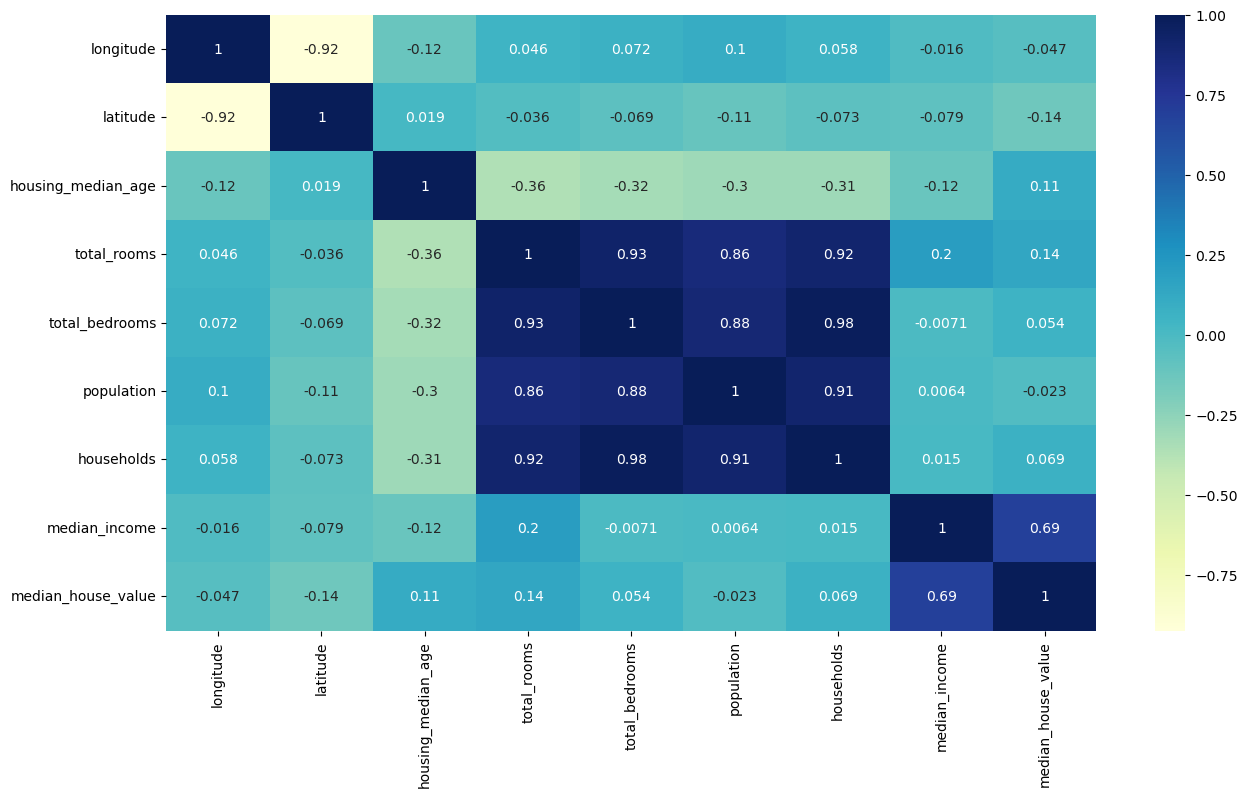

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes(include='number').corr() , annot=True, cmap="YlGnBu")

In [54]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

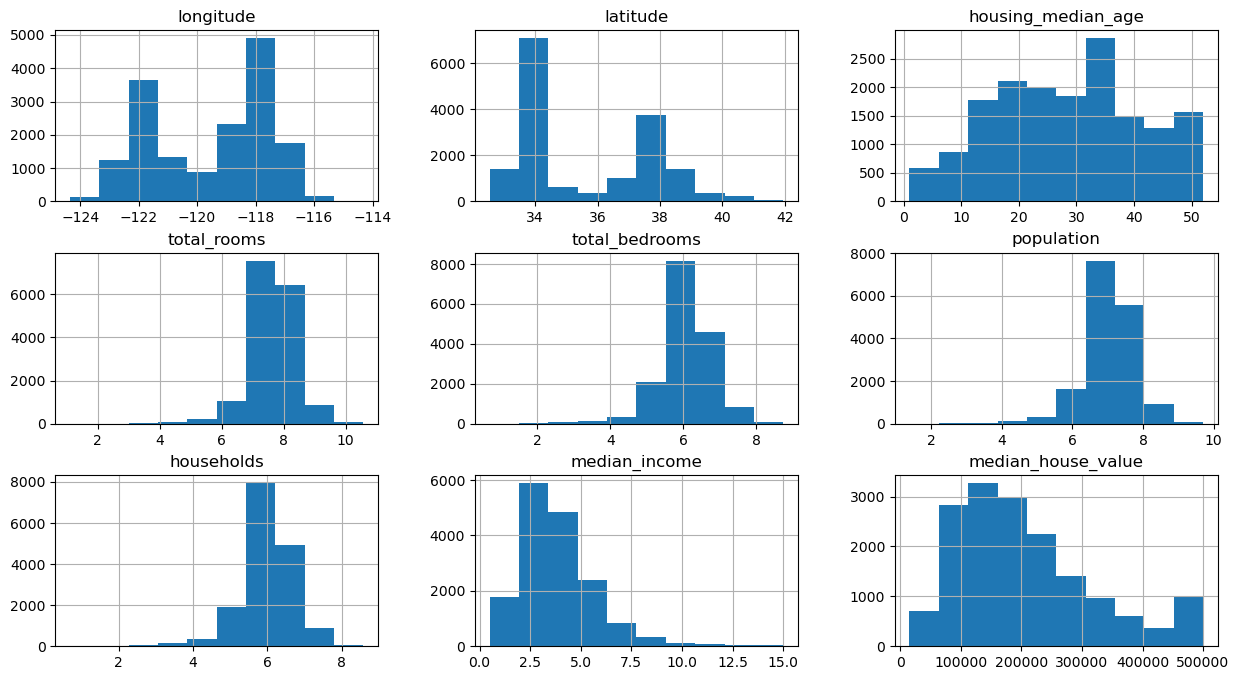

In [56]:
train_data.hist(figsize=(15,8))

In [60]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7200
INLAND        5183
NEAR OCEAN    2100
NEAR BAY      1859
ISLAND           4
Name: count, dtype: int64

In [66]:
pd.get_dummies(train_data.ocean_proximity ,  dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6809,1,0,0,0,0
7403,1,0,0,0,0
13939,0,1,0,0,0
4176,1,0,0,0,0
1470,0,1,0,0,0
...,...,...,...,...,...
9583,0,1,0,0,0
16680,1,0,0,0,0
8743,1,0,0,0,0
5848,1,0,0,0,0


In [68]:
train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6809,-118.11,34.10,20.0,8.036250,6.688355,7.654443,6.605298,3.3801,<1H OCEAN,192500.0,1,0,0,0,0
7403,-118.23,33.95,27.0,6.224558,4.962845,6.672033,5.123964,0.9518,<1H OCEAN,91400.0,1,0,0,0,0
13939,-117.27,34.23,26.0,8.754634,7.126891,7.071573,6.146329,3.7708,INLAND,110400.0,0,1,0,0,0
4176,-118.22,34.10,33.0,7.551712,5.958425,7.080026,5.831882,4.0469,<1H OCEAN,196600.0,1,0,0,0,0
1470,-121.98,37.95,16.0,8.001355,6.008813,7.183871,5.986452,6.7821,INLAND,265900.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9583,-120.50,37.32,13.0,7.568896,5.953243,7.055313,5.908083,2.7500,INLAND,83200.0,0,1,0,0,0
16680,-120.59,35.13,8.0,8.800717,6.961296,7.905073,6.874198,4.6776,<1H OCEAN,295500.0,1,0,0,0,0
8743,-118.32,33.81,28.0,7.669962,6.100319,7.039660,6.047372,4.8438,<1H OCEAN,346200.0,1,0,0,0,0
5848,-118.31,34.18,11.0,8.043342,6.792344,7.438972,6.747587,3.1587,<1H OCEAN,181300.0,1,0,0,0,0


In [76]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'],axis=1)

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [78]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6809,-118.11,34.10,20.0,8.036250,6.688355,7.654443,6.605298,3.3801,192500.0,1,0,0,0,0
7403,-118.23,33.95,27.0,6.224558,4.962845,6.672033,5.123964,0.9518,91400.0,1,0,0,0,0
13939,-117.27,34.23,26.0,8.754634,7.126891,7.071573,6.146329,3.7708,110400.0,0,1,0,0,0
4176,-118.22,34.10,33.0,7.551712,5.958425,7.080026,5.831882,4.0469,196600.0,1,0,0,0,0
1470,-121.98,37.95,16.0,8.001355,6.008813,7.183871,5.986452,6.7821,265900.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9583,-120.50,37.32,13.0,7.568896,5.953243,7.055313,5.908083,2.7500,83200.0,0,1,0,0,0
16680,-120.59,35.13,8.0,8.800717,6.961296,7.905073,6.874198,4.6776,295500.0,1,0,0,0,0
8743,-118.32,33.81,28.0,7.669962,6.100319,7.039660,6.047372,4.8438,346200.0,1,0,0,0,0
5848,-118.31,34.18,11.0,8.043342,6.792344,7.438972,6.747587,3.1587,181300.0,1,0,0,0,0


<Axes: >

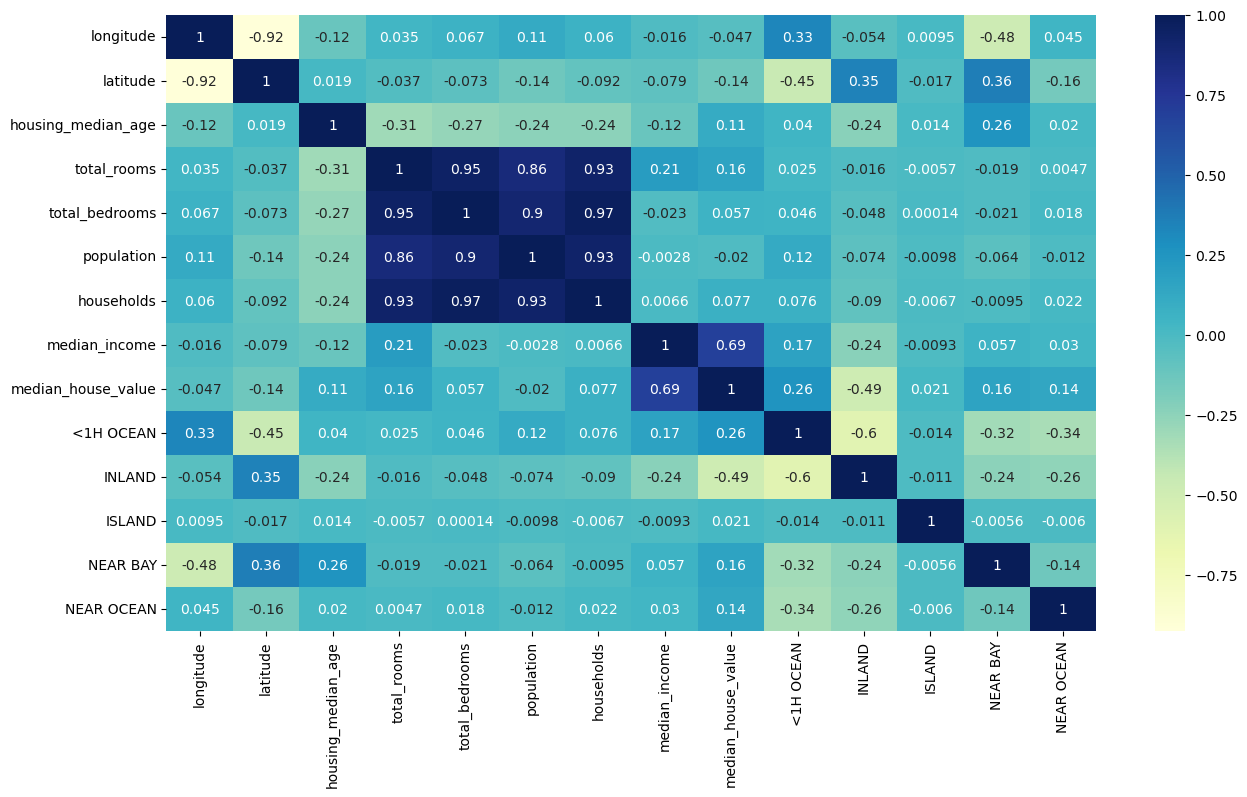

In [80]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes(include='number').corr() , annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

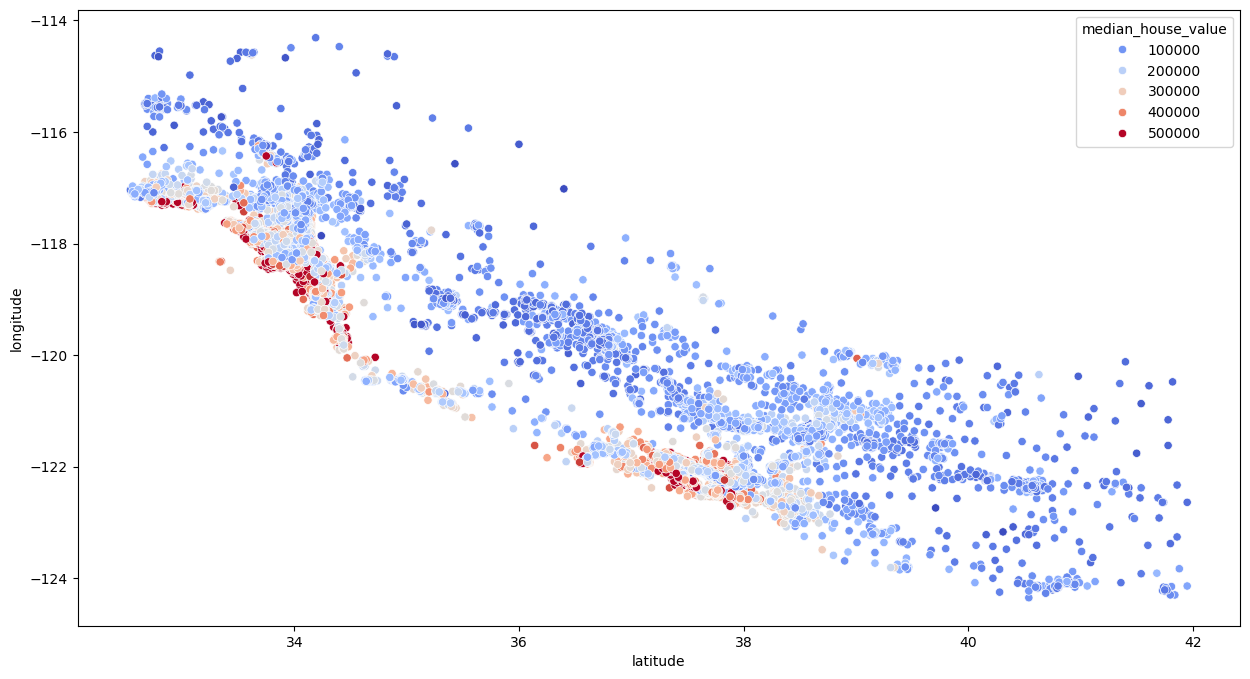

In [82]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [84]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

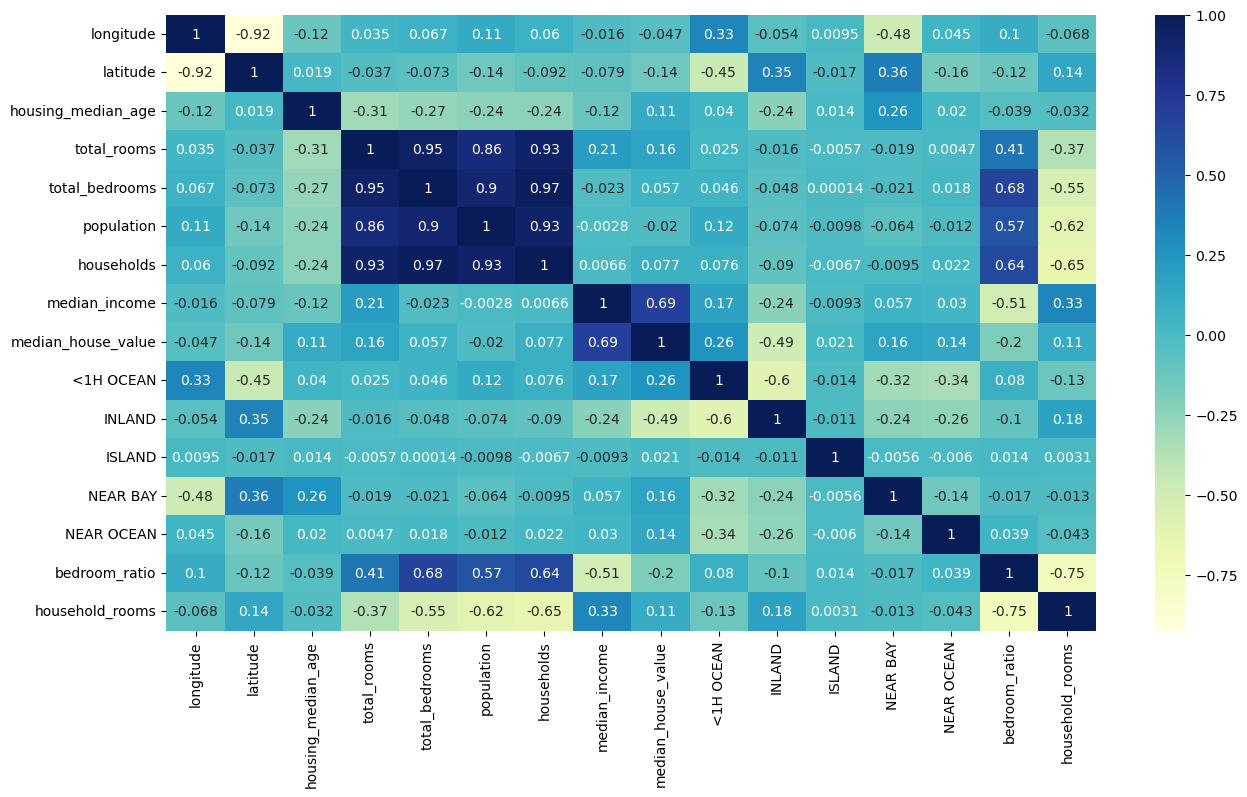

In [86]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes(include='number').corr() , annot=True, cmap="YlGnBu")

In [ ]:
# 

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_tain,y_tain=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

x_train_s=scaler.fit_transform(x_train)

reg=LinearRegression()
reg.fit(x_tain_s,y_tain)

ValueError: could not convert string to float: '<1H OCEAN'

In [106]:
test_data=x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [124]:
x_test_s=scaler.transform(x_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- <1H OCEAN
- INLAND
- ISLAND
- NEAR BAY
- NEAR OCEAN
- ...
Feature names seen at fit time, yet now missing:
- ocean_proximity


In [96]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
9471,-123.85,39.42,11.0,7.498316,6.228511,6.797940,6.113682,1.7574,150000.0,1,0,0,0,0,0.830655,1.226481
18711,-122.42,40.59,24.0,8.526351,6.880384,7.705713,6.887553,2.6792,138900.0,0,1,0,0,0,0.806955,1.237936
12836,-121.46,38.68,35.0,7.170120,5.541264,6.559615,5.505332,2.8333,103000.0,0,1,0,0,0,0.772827,1.302396
9761,-121.74,36.49,33.0,7.990577,6.338594,7.142827,6.249975,4.4209,274600.0,1,0,0,0,0,0.793259,1.278497
8099,-118.22,33.81,41.0,6.588926,5.117994,6.401917,5.214936,3.7885,156900.0,0,0,0,0,1,0.776757,1.263472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,-117.98,33.78,22.0,8.356085,6.879356,7.973155,6.825460,3.2636,180200.0,1,0,0,0,0,0.823275,1.224252
19588,-120.76,37.58,35.0,7.241366,5.579730,6.629363,5.537334,3.6181,178600.0,0,1,0,0,0,0.770536,1.307735
17167,-122.25,37.45,34.0,8.006368,5.902633,6.833032,5.913503,10.2811,500001.0,0,0,0,0,1,0.737242,1.353913
15631,-122.40,37.80,52.0,7.404279,6.347389,7.267525,6.242223,1.9063,300000.0,0,0,0,1,0,0.857260,1.186161


In [126]:
reg.score(x_test_s,y_test)

NameError: name 'x_test_s' is not defined

In [132]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
forest.fit(x_tain_s,y_tain)

NameError: name 'x_tain_s' is not defined

In [130]:
forest.score(x_test_s,y_test)

0.8046729458859855